In [137]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd
import csv

In [147]:
# Constants
MAX = 2e9
MIN = 1e-5
NUM_DEC = 5
FACTOR = 0.9
MIN_P = 0.55
MAX_P = 0.95
SMALL = 50
MEDIUM = 100
LARGE = 200
SMALL_H = 50
MEDIUM_H = 100
LARGE_H = 200

In [25]:
# G = nx.Graph([(1,1), (2,2), (1,2), (1,2)])
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_edge(1, 2)
G.add_edge(2, 2)
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1]
 [1 1]]


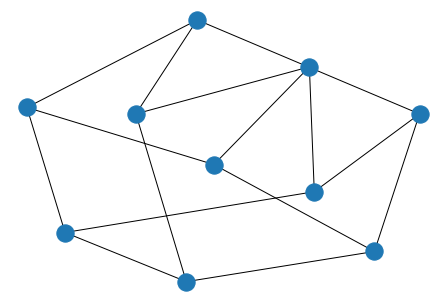

In [4]:
G = nx.Graph()
# H = nx.path_graph(2)
# G.add_nodes_from(H)
G = nx.petersen_graph()
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
# plt.show()
# plt.subplot(121)

# nx.draw(G, with_labels=True, font_weight='bold')
# plt.subplot(122)

# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')


[0, 1, 2]
[(0, 1), (0, 2), (1, 2)]
{'weight': 4.7}
0


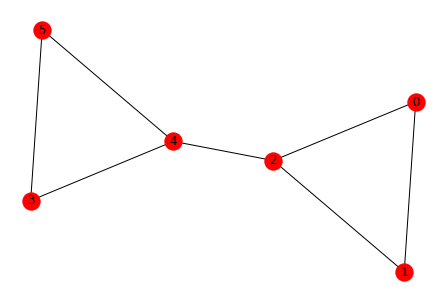

In [59]:
G1 = nx.complete_graph(3)
# plt.subplot(121)
# nx.draw(G1, node_color='blue', with_labels=True)
print(list(G1.nodes()))
print(list(G1.edges()))

G2 = nx.complete_graph(range(3,6))
# plt.subplot(122)
# nx.draw(G2, node_color='red', with_labels=True)

G3 = nx.union(G1, G2)
G3.add_edge(2, 4, weight=4.7)
print(G3[4][2])
nx.draw(G3, node_color='red', with_labels=True)
print(list(G.nodes()).pop())

In [113]:
def add_weights(g):
    w1 = rd.uniform(MIN, MAX)
    w2 = rd.uniform(MIN_P * w1, MAX_P * w1)
    w3 = rd.uniform(MIN_P * w1, MAX_P * w1)
    ws = [w1, w2, w3]
    for _, data in g.edges.items():
        data['weight'] = round(ws.pop(), NUM_DEC)
    
def connect(G, g):
    Gnodes = list(G.nodes)
    gnodes = list(g.nodes)
    G = nx.union(G, g)
    for n in gnodes:
        idx = rd.randrange(0, len(Gnodes))
        a = Gnodes.pop(idx)
        try:
            w = nx.shortest_path_length(G, source=a, target=n) * FACTOR
        except nx.NetworkXNoPath:
            ws = [i for _, _, i in g.edges.data('weight')]
            w = rd.uniform(min(ws), max(ws)) * FACTOR
        G.add_edge(a, n, weight=round(w, NUM_DEC))
    return G
        
def gen_graph(n):
    G = nx.Graph()
    while n:
        a = n.pop()
        b = n.pop()
        c = n.pop()
        nodes = [a, b, c]
        g = nx.complete_graph(nodes)
        add_weights(g)
        if len(G.nodes) == 0:
            G = g
        else:
            G = connect(G, g)
    return G

[[3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 1244979704.36479, 1922090307.76993, 'x'], [3.6, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 12449

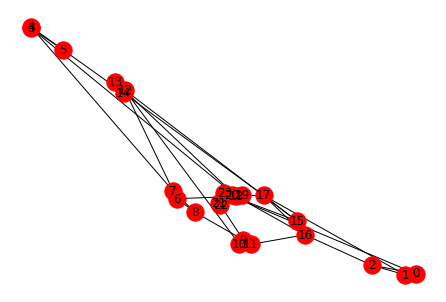

In [135]:
G = gen_graph(list(range(24)))
try:
    nx.shortest_path_length(G, source=2, target=3)
except nx.NetworkXNoPath:
    print("No path")
# for e in G.edges.items():
#     print(e)
nx.draw(G, node_color='red', with_labels=True)
A = nx.adjacency_matrix(G).toarray()
B = [[None] * len(A[0])] * len(A)
for i in range(len(A)):
    for j in range(len(A[0])):
        if A[i][j] == 0.0:
            B[i][j] = 'x'
        else:
            B[i][j] = A[i][j]
print(B)

In [136]:
def write_to_file(file, string, append=False):
    if append:
        mode = 'a'
    else:
        mode = 'w'
    with open(file, mode) as f:
        f.write(string)


def write_data_to_file(file, data, separator, append=False):
    if append:
        mode = 'a'
    else:
        mode = 'w'
    with open(file, mode) as f:
        for item in data:
            f.write(f'{item}{separator}')

In [145]:
f = open('world-cities.csv')
csv_f = csv.reader(f)
world_cities = []
for r in csv_f:
    name = r[0]
    if name.isalpha() and name != 'name':
        world_cities.append(name)
city_num = len(world_cities)
# print(world_cities)
small_list = []
medium_list = []
large_list = []
for i in range(SMALL):
    idx = rd.randrange(0, city_num)
    small_list.append(world_cities[idx])
for i in range(MEDIUM):
    idx = rd.randrange(0, city_num)
    medium_list.append(world_cities[idx])
for i in range(LARGE):
    idx = rd.randrange(0, city_num)
    large_list.append(world_cities[idx])

In [146]:
input_file = "7\n4\nSoda"
write_to_file("input.txt", input_file)